In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk

In [0]:
df = pd.read_excel('/content/drive/My Drive/Capstone Project/Input_Data.xlsx')

In [0]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
print(df.shape)
print(df.size)
print(df.info())

(8500, 4)
34000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB
None


In [0]:
df.groupby('Assignment group').describe()

Desc_word_count                        ... Short_desc_word_count            
                           count       mean        std  ...                   50%   75%   max
Assignment group                                        ...                                  
GRP_0                     3976.0  18.286720  28.387787  ...                   5.0   7.0  28.0
GRP_1                       31.0  27.838710  26.991476  ...                   9.0  12.0  17.0
GRP_10                     140.0  26.442857  25.934414  ...                   8.0   9.0  18.0
GRP_11                      30.0  46.200000  50.419208  ...                   6.0   8.0  14.0
GRP_12                     257.0  38.361868  98.900229  ...                   9.0  12.0  23.0
...                          ...        ...        ...  ...                   ...   ...   ...
GRP_71                       2.0  36.000000  21.213203  ...                  12.0  15.5  19.0
GRP_72                       2.0   4.000000   2.828427  ...                   4.0   5.0   6.0
GRP_73                       1.0  55.000000        NaN  ...                   4.0   4.0   4.0
GRP_8                      661.0  37.804841  49.181603  ...                   8.0  12.0  24.0
GRP_9                      252.0  20.857143  28.617609  ...                   8.0   8.0  23.0

[74 rows x 16 columns]

In [0]:
print(len(df['Short description']))
print(len(set(df['Short description'])))
len(df['Short description'].unique())

8500
7482


7482

In [0]:
print(len(df['Description']))
print(len(set(df['Description'])))
len(df['Description'].unique())

8500
7818


7818

In [0]:
print(len(df['Caller']))
print(len(set(df['Caller'])))
len(df['Caller'].unique())

8500
2950


2950

In [0]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [0]:
null_value = (df.isna().sum()/df.count().round(2))*100
print(null_value)

Short description    0.094206
Description          0.011766
Caller               0.000000
Assignment group     0.000000
dtype: float64


Text(0.5, 0, 'Table Features')

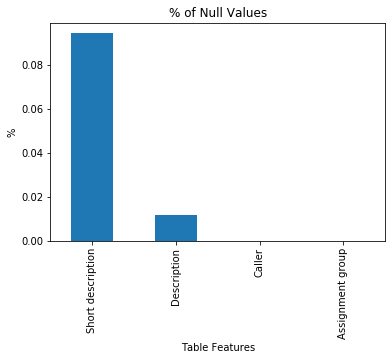

In [0]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')


In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
print(group_freq)

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_61       1
GRP_73       1
GRP_35       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64


In [0]:
group_freq = (df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False).round(2)/df['Assignment group'].count())*100

Text(0.5, 0, 'Group')

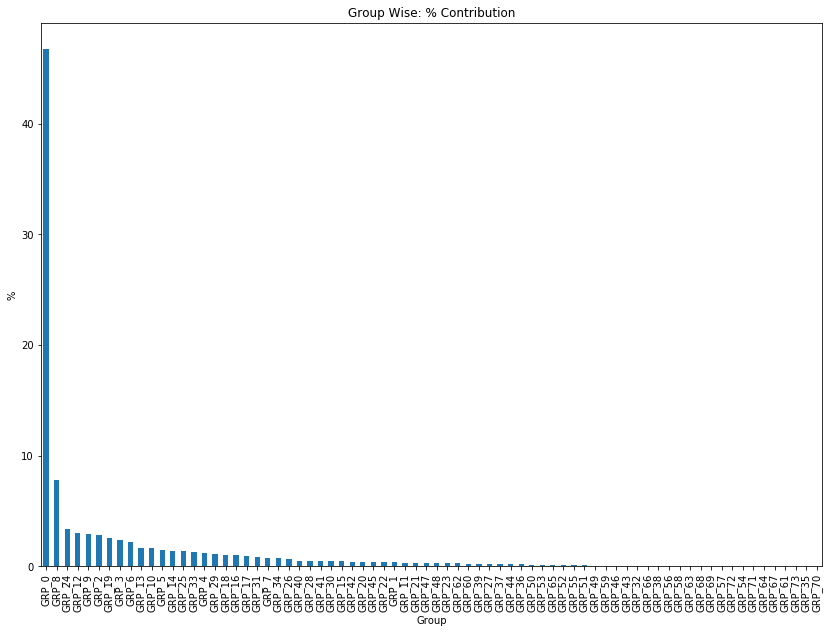

In [0]:
group_freq.plot(kind='bar',figsize=(14,10))
plt.title('Group Wise: % Contribution')
plt.ylabel('%')
plt.xlabel('Group')

In [0]:
caller_freq = (df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False).round(2)/df['Caller'].count()).round(3)*100
print(caller_freq)

Caller
bpctwhsn kzqsbmtp    9.5
ZkBogxib QsEJzdZO    1.8
fumkcsji sarmtlhy    1.6
rbozivdq gmlhrtvp    1.0
rkupnshb gsmzfojw    0.8
                    ... 
kcldufqe xghvrzoi    0.0
kclhqspo xvugztyc    0.0
tbloeczi gxlmeyph    0.0
kcqzrgef awnjdlyr    0.0
nhixruet elnjqdwg    0.0
Name: Caller, Length: 2950, dtype: float64


In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [0]:
df['Desc_word_count'] = df['Description'].str.split().map(len)
df['Short_desc_word_count'] = df['Short description'].str.split().map(len)
df.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_desc_word_count
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,2,2


In [0]:
df['Desc_word_count'].describe()

count    8500.000000
mean       27.274235
std        65.041809
min         0.000000
25%         6.000000
50%        11.000000
75%        28.000000
max      1625.000000
Name: Desc_word_count, dtype: float64

In [0]:
df['Short_desc_word_count'].describe()

count    8500.000000
mean        6.928235
std         4.121496
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        28.000000
Name: Short_desc_word_count, dtype: float64

In [0]:
import re

In [0]:
df1 = df.copy(deep=True)

In [0]:
df1.drop(['Desc_word_count','Short_desc_word_count'],axis=1,inplace=True)

In [0]:
df1['Description'] = df1['Description'].astype(str)
df1['Short description'] = df1['Short description'].astype(str)
df1['Caller'] = df1['Caller'].astype(str)

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8500 non-null object
Description          8500 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [0]:
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\W", ' ', x)) # Removed all punctuations or non word characters marks
df1['Description'] = df1['Description'].apply(lambda x: x.lower()) #Converted to lower case
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'\s+[a-z]\s+', ' ', x)) # Removed all single characters
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^[a-z]\s+", ' ', x)) # Removed all single characters from start of the sentence
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]", ' ', x)) # Removed all the special characters
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+", ' ', x))# Removed extra (one or more) spaces
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\d", '', x)) # Removed digits
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s+[a-zA-Z]\s+", '', x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"^\s", '', x)) # Removed all the space at starta and end of sentences
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"\s$", '', x)) ## Removed all the space at starta and end of sentences

In [0]:
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"that's","that is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"there's","there is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"what's","what is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"where's","where is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"it's","it is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who's","who is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"i'm","i am",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"she's","she is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"he's","he is",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"they're","they are",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"who're","who are", x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"ain't","am not", x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"wouldn't","would not",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"can't","can not",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"shouldn't","should not",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"couldn't","could not",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"won't","will not",x))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r"isn't","is not",x))

In [0]:
df1.head(100)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi c...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
95,job SID_26cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
96,job SID_35cold failed in job_scheduler at: 10/...,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
97,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,amssm label sys amssm ef on server is over spa...,jyoqwxhz clhxsoqy,GRP_12
98,unable to view payslips from hr_tool e time,unable to view payslips from hr tool time,vzrbocfl wxtpoyez,GRP_0


In [0]:
  df1['Description'][1]

'received from hmjdrvpb komuaywn gmail com hello team my meetings skype meetings etc are not appearing in my outlook calendar can somebody please advise how to correct this kind'

In [0]:
df['Description'][1]

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [0]:
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"\W", ' ', x)) # Removed all punctuations or non word characters marks
df1['Short description'] = df1['Short description'].apply(lambda x: x.lower()) #Converted to lower case
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r'\s+[a-z]\s+', ' ', x)) # Removed all single characters
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"^[a-z]\s+", ' ', x)) # Removed all single characters from start of the sentence
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]", ' ', x)) # Removed all the special characters
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"\s+", ' ', x))# Removed extra (one or more) spaces
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"\d", '', x)) # Removed digits
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"\s+[a-zA-Z]\s+", '', x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"^\s", '', x)) # Removed all the space at starta and end of sentences
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"\s$", '', x)) ## Removed all the space at starta and end of sentences

In [0]:
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"that's","that is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"there's","there is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"what's","what is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"where's","where is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"it's","it is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"who's","who is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"i'm","i am",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"she's","she is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"he's","he is",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"they're","they are",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"who're","who are", x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"ain't","am not", x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"wouldn't","would not",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"can't","can not",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"shouldn't","should not",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"couldn't","could not",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"won't","will not",x))
df1['Short description'] = df1['Short description'].apply(lambda x: re.sub(r"isn't","is not",x))

In [0]:
df1.head(100)

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi c...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
95,job sid cold failed in job scheduler at,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
96,job sid cold failed in job scheduler at,received from monitoring tool company com job ...,bpctwhsn kzqsbmtp,GRP_5
97,amssm label sys amssm ef on server is over spa...,amssm label sys amssm ef on server is over spa...,jyoqwxhz clhxsoqy,GRP_12
98,unable to view payslips from hr tool time,unable to view payslips from hr tool time,vzrbocfl wxtpoyez,GRP_0


In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))#stop words stored in 'a'

In [0]:
from nltk.tokenize import word_tokenize
df1['Description'] = [word_tokenize(i) for i in df1['Description']]
df1['Short description'] = [word_tokenize(i) for i in df1['Short description']]

In [0]:
df1.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, from, hmjdrvpb, komuaywn, gmail, co...",hmjdrvpb komuaywn,GRP_0
2,"[cant, log, in, to, vpn]","[received, from, eylqgodm, ybqkwiam, gmail, co...",eylqgodm ybqkwiam,GRP_0
3,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [0]:
df1['Description']= df1['Description'].apply(lambda x: [item for item in x if item not in stop_words])
df1['Short description']= df1['Short description'].apply(lambda x: [item for item in x if item not in stop_words])  

In [0]:
df1.head()

,Short description,Description,Caller,Assignment group
0,"[login, issue]","[verified, user, details, employee, manager, n...",spxjnwir pjlcoqds,GRP_0
1,[outlook],"[received, hmjdrvpb, komuaywn, gmail, com, hel...",hmjdrvpb komuaywn,GRP_0
2,"[cant, log, vpn]","[received, eylqgodm, ybqkwiam, gmail, com, hi,...",eylqgodm ybqkwiam,GRP_0
3,"[unable, access, hr, tool, page]","[unable, access, hr, tool, page]",xbkucsvz gcpydteq,GRP_0
4,"[skype, error]","[skype, error]",owlgqjme qhcozdfx,GRP_0


In [0]:
df1['Desc_word_count'] = df1['Description'].str.split().map(len)
df1['Short_desc_word_count'] = df1['Short description'].str.split().map(len)
df1.head()

,Short description,Description,Caller,Assignment group,Desc_word_count,Short_desc_word_count
0,"['login', 'issue']","['verified', 'user', 'details', 'employee', 'm...",spxjnwir pjlcoqds,GRP_0,22,2
1,['outlook'],"['received', 'hmjdrvpb', 'komuaywn', 'gmail', ...",hmjdrvpb komuaywn,GRP_0,19,1
2,"['cant', 'log', 'vpn']","['received', 'eylqgodm', 'ybqkwiam', 'gmail', ...",eylqgodm ybqkwiam,GRP_0,9,3
3,"['unable', 'access', 'hr', 'tool', 'page']","['unable', 'access', 'hr', 'tool', 'page']",xbkucsvz gcpydteq,GRP_0,5,5
4,"['skype', 'error']","['skype', 'error']",owlgqjme qhcozdfx,GRP_0,2,2


In [0]:
df1.describe()

,Desc_word_count,Short_desc_word_count
count,8500.000000,8500.000000
mean,19.553294,5.316235
std,40.073017,2.909425
min,1.000000,1.000000
25%,5.000000,3.000000
50%,10.000000,5.000000
75%,21.000000,7.000000
max,822.000000,33.000000


In [0]:
df2 = df1.copy(deep=True)

In [0]:
df2.drop(['Desc_word_count','Short_desc_word_count','Short description','Caller'],axis=1,inplace=True)

In [0]:
df2.head()

,Description,Assignment group
0,"['verified', 'user', 'details', 'employee', 'm...",GRP_0
1,"['received', 'hmjdrvpb', 'komuaywn', 'gmail', ...",GRP_0
2,"['received', 'eylqgodm', 'ybqkwiam', 'gmail', ...",GRP_0
3,"['unable', 'access', 'hr', 'tool', 'page']",GRP_0
4,"['skype', 'error']",GRP_0


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()

In [0]:
x = cv.fit_transform(df2['Description'])
y = df2['Assignment group']

In [0]:
x.shape

(8500, 15953)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6951470588235295
0.6423529411764706


In [0]:
y_pred = model.predict(x_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.69      0.98      0.81       825
       GRP_1       0.00      0.00      0.00         3
      GRP_10       0.00      0.00      0.00        27
      GRP_11       0.00      0.00      0.00         3
      GRP_12       0.40      0.37      0.38        46
      GRP_13       0.31      0.39      0.34        28
      GRP_14       0.80      0.17      0.28        24
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        12
      GRP_18       0.67      0.10      0.17        20
      GRP_19       0.83      0.14      0.23        37
       GRP_2       0.67      0.43      0.52        47
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         9
      GRP_22       0.00      0.00      0.00         4
      GRP_23       0.00      0.00      0.00         9
      GRP_24       0.71    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
print(svc.score(x_test,y_test))
y_pred1 = svc.predict(x_test)

0.673235294117647
0.6241176470588236


In [0]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
print(DT.score(x_train,y_train))
print(DT.score(x_test,y_test))
y_pred2 = DT.predict(x_test)

0.9523529411764706
0.6011764705882353


In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
print(RF.score(x_test,y_test))
y_pred2 = RF.predict(x_test)

0.9523529411764706
0.6588235294117647


In [0]:
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
print(BC.score(x_train,y_train))
print(BC.score(x_test,y_test))
y_pred2 = BC.predict(x_test)

0.9286764705882353
0.6488235294117647


In [0]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
print(ABC.score(x_train,y_train))
print(ABC.score(x_test,y_test))
y_pred2 = ABC.predict(x_test)

0.5129411764705882
0.5370588235294118


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfd = TfidfVectorizer()

In [0]:
x1 = tfd.fit_transform(df2['Description'])
y1 = df2['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [0]:
model1 = MultinomialNB()
model1.fit(x1_train, y1_train)
print(model1.score(x1_train,y1_train))
print(model1.score(x1_test,y1_test))
y_pred = model1.predict(x1_test)

0.5614705882352942
0.5794117647058824


In [0]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x1_train,y1_train)
print(RF.score(x1_train,y1_train))
print(RF.score(x1_test,y1_test))
y_pred2 = RF.predict(x1_test)

0.9523529411764706
0.6623529411764706


In [0]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x1_train,y1_train)
print(DT.score(x1_train,y1_train))
print(DT.score(x1_test,y1_test))
y_pred2 = DT.predict(x1_test)

0.9523529411764706
0.5970588235294118
